<h1 style="color:#339ACD; font-size:25px; font-weight: bold;">QuarkCircuit: Construction, Visualization, and Transpilation of Quantum Circuits</h1>

<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Installation</h2>

<div style="background-color: #f5f5f5; padding: 10px; border-radius: 5px; box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.2); font-family: consolas; color: #66BFE7; font-size: 20px;">
    <code>pip install quarkcircuit</code>
</div>


<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Construct and visualize a quantum circuit</h2>

In [10]:
from quark.circuit import QuantumCircuit

nqubits = 4
qc = QuantumCircuit(nqubits)
qc.h(0)
for i in range(1,nqubits):
    qc.cx(0,i)
qc.barrier()
qc.measure_all()
qc.draw()

<div style="color: #FA8072; font-size:20px;">Note: For better circuit display, please set your chrome or VS Code to a monospaced font, such as "Consolas".</div>

<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Transpile a quantum circuit</h2>

<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Build a Backend</h3>

<div style="color:#66BFE7; font-size:20px;">Approach 1: Load BAQIS superconducting quantum computer</div>

In [2]:
from quark.circuit import Backend

chip_name = 'Baihua'
chip_backend = Backend(chip_name)

Baihua configuration load done!
The last calibration time was 2024-11-01 14:44:44


<div style="color:#66BFE7; font-size:20px;">Approach 2: Build custom</div>

In [3]:
fake_backend = Backend('Custom')
fake_backend.edges_with_weight = [(0,1,0.997779),(1,2,0.998),(1,3,0.987),(2,4,0.977),(3,4,0.876),(4,5,0.988),\
                                  (4,6,0.956),(5,6,0.978),(5,7,0.569),(6,7,0.658),(8,9,0.888),(9,10,0.999)]
fake_backend.nodes_with_position = {0:(1, 1),1:(1,-1),2:(0,-2),3:(2,-2),4:(1,-3),5:(0,-4),6:(2,-4),\
                                    7:(1,-5),8:(0,-6),9:(1,-6),10:(2,-6)}
#fake_backend.draw()

<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">Transpile</h3>

In [9]:
from quark.circuit import Transpiler

In [20]:
# chip backend
qct1 = Transpiler(qc,chip_backend).run(optimize_level = 0)
print(qct1.depth)
qct1.draw_simply()

Layout qubits [14, 15, 16, 17] selected from chip backend priority qubits, the coupling map is [(16, 15), (16, 17), (14, 15)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     14     -->     15    
    1      -->     15     -->     16    
    2      -->     16     -->     14    
    3      -->     17     -->     17    
('u', 1.5707963267948966, 0.0, 3.141592653589793, 14)
Mapping to basic gates done !
10


In [ ]:
# fake backend
qct2 = Transpiler(qc, fake_backend).run(optimize_level = 0)
print(qct2.depth)
qct2.draw_simply()

No priority qubits with 4 qubits found, it will set use_priority as 'False' to search.
Layout qubits [1, 2, 4, 5] selected from chip backend priority qubits, the coupling map is [(1, 2), (2, 4), (4, 5)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     1      -->     2     
    1      -->     2      -->     4     
    2      -->     4      -->     1     
    3      -->     5      -->     5     
('u', 1.5707963267948966, 0.0, 3.141592653589793, 1)
Mapping to basic gates done !
10


<h3 style="color:#339ACD; font-size:25px; font-weight: bold;">
Submit the circuit to the Baihua backend for execution via QuarkStudio</h3>

In [21]:
circuit = qct1.to_qlisp
for gate in circuit:
    print(gate)

('CZ', ('Q14', 'Q15'))
(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q17')
(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q14')
(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q15')
('CZ', ('Q14', 'Q15'))
('CZ', ('Q15', 'Q16'))
(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q15')
(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q16')
('CZ', ('Q15', 'Q16'))
(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q16')
('CZ', ('Q16', 'Q17'))
(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q17')
('Barrier', ('Q16', 'Q14', 'Q15', 'Q17'))
(('Measure', 1), 'Q14')
(('Measure', 2), 'Q15')
(('Measure', 0), 'Q16')
(('Measure', 3), 'Q17')


In [23]:
from quark import Task
mytoken = '1y4::T:ktfLR6Q5g{E.4PPMe5135qFvMIn7Z7VB:dYb/Rg1hEP1RUO{5TP4ZUO{V{N{dUN7JDd5WnJtJTPypUN1pUPxBzOx1TNy1DOzBkNjpkJ1GXbjxjJvOnMkGnM{mXdiKHR5i4cimHfjpkJzW3d2Kzf'
tmgr = Task(mytoken)

In [24]:
task = {
  'chip': 'Baihua',  # chip name
  'name': 'MyFirstQuantumTask',  # task name
  'circuit':circuit, # the transpiled circuit written in qlisp
  'compile': False, # No need to execute transpile again
  'correct': True # Bayesian correction for the readout
}

In [25]:
tid = tmgr.run(task, repeat=1) # shots = repeat*1024
print(tid) # tid refers to task id

2411071006030641202


In [28]:
res = tmgr.result(tid)
res

{'count': {'1111': 318,
  '0010': 7,
  '1101': 18,
  '0001': 39,
  '0000': 441,
  '0111': 26,
  '1010': 6,
  '1110': 52,
  '0110': 24,
  '1100': 7,
  '0100': 48,
  '1011': 28,
  '0011': 1,
  '1000': 3,
  '0101': 2,
  '1001': 4},
 'corrected': {},
 'transpiled': '',
 'qlisp': "[('CZ', ('Q14', 'Q15')),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q17'),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q14'),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q15'),\n('CZ', ('Q14', 'Q15')),\n('CZ', ('Q15', 'Q16')),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q15'),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q16'),\n('CZ', ('Q15', 'Q16')),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q16'),\n('CZ', ('Q16', 'Q17')),\n(('u3', 1.5707963267948966, 0.0, 3.141592653589793), 'Q17'),\n('Barrier', ('Q16', 'Q14', 'Q15', 'Q17')),\n(('Measure', 1), 'Q14'),\n(('Measure', 2), 'Q15'),\n(('Measure', 0), 'Q16'),\n(('Measure', 3), 'Q17')]",
 'tid': 241107

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '0000'),
  Text(1, 0, '0001'),
  Text(2, 0, '0010'),
  Text(3, 0, '0011'),
  Text(4, 0, '0100'),
  Text(5, 0, '0101'),
  Text(6, 0, '0110'),
  Text(7, 0, '0111'),
  Text(8, 0, '1000'),
  Text(9, 0, '1001'),
  Text(10, 0, '1010'),
  Text(11, 0, '1011'),
  Text(12, 0, '1100'),
  Text(13, 0, '1101'),
  Text(14, 0, '1110'),
  Text(15, 0, '1111')])

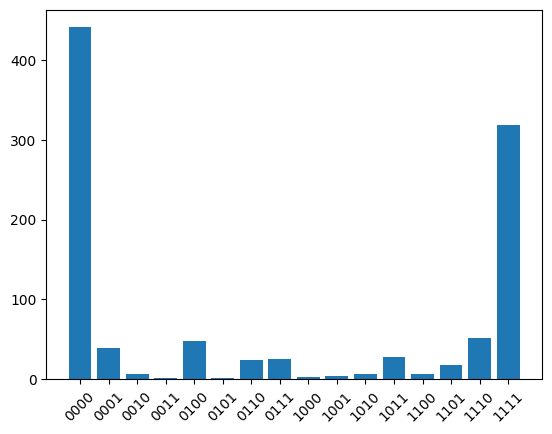

In [29]:
import matplotlib.pyplot as plt
data = res['count']
bases = sorted(data)
count = [data[base] for base in bases]

plt.bar(bases, count)
plt.xticks(rotation=45)

<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Transpile Supplementary: Step by step</h2>

In [32]:
from quark.circuit import Backend, Transpiler, generate_ghz_state

In [33]:
# step0: define a quantum circuit need to transpile
nqubits = 4
qc = generate_ghz_state(nqubits)
qc.barrier()
qc.measure_all()
qc.draw()

In [34]:
# step1: specify a backend
chip_name = 'Baihua'
chip_backend = Backend(chip_name)

Baihua configuration load done!
The last calibration time was 2024-11-01 14:44:44


In [35]:
# step2: specify a layout or select automatically, in this example, the layout is selected automatically. 
qct = Transpiler(qc,chip_backend).run_select_layout() #support custom run_select_layout(use_priority=False,initial_mapping=[53,54,55,56]])
qct.draw_simply()

Layout qubits [14, 15, 16, 17] selected from chip backend priority qubits, the coupling map is [(16, 15), (16, 17), (14, 15)].


In [36]:
# step3: sepcify a routing method, in this example, the basic routing were used.
qct = Transpiler(qc,chip_backend)._select_layout().run_basic_routing() # it will retun a quantum circuit with basic routing applied.
qct.draw_simply()

Layout qubits [14, 15, 16, 17] selected from chip backend priority qubits, the coupling map is [(16, 15), (16, 17), (14, 15)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     14     -->     15    
    1      -->     15     -->     16    
    2      -->     16     -->     14    
    3      -->     17     -->     17    


In [38]:
qct = Transpiler(qc,chip_backend)._select_layout()._sabre_routing(iterations=3).run_basic_gates() # it will retun a quantum circuit with basic routing applied.
qct.draw_simply()

Layout qubits [14, 15, 16, 17] selected from chip backend priority qubits, the coupling map is [(16, 15), (16, 17), (14, 15)].
sabre routing results, after 3 iteration(s)
virtual qubit --> initial mapping --> after routing
    0      -->     17     -->     16    
    1      -->     15     -->     14    
    2      -->     14     -->     15    
    3      -->     16     -->     17    
Mapping to basic gates done !


In [27]:
# step4: convert the routed circuit into basic gates (U3 and CZ gates).
qct = Transpiler(qc,chip_backend)._select_layout()._basic_routing().run_basic_gates()
print(qct.depth)
qct.draw_simply()

Layout qubits [13, 14, 15, 16] selected from chip backend priority qubits, the coupling map is [(16, 15), (13, 14), (14, 15)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     13     -->     14    
    1      -->     14     -->     15    
    2      -->     15     -->     13    
    3      -->     16     -->     16    
Mapping to basic gates done !
22


In [28]:
# step5: perform single- and two-qubit gate optimization.
qct = Transpiler(qc,chip_backend)._select_layout()._basic_routing()._basic_gates().run_gate_optimize()
print(qct.depth)
qct.draw_simply()

Layout qubits [13, 14, 15, 16] selected from chip backend priority qubits, the coupling map is [(16, 15), (13, 14), (14, 15)].
basic routing results:
virtual qubit --> initial mapping --> after routing
    0      -->     13     -->     14    
    1      -->     14     -->     15    
    2      -->     15     -->     13    
    3      -->     16     -->     16    
Mapping to basic gates done !
10


<h2 style="color:#339ACD; font-size:25px; font-weight: bold;">Transpile Supplementary: Individually invoke each function.</h2>

In [29]:
nqubits = 3
qc = generate_ghz_state(nqubits)
qct = Transpiler(qc).run_basic_gates()
qct.draw()

Mapping to basic gates done !
